In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('./dataset.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [4]:
dataset.isna().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [5]:
dataset['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
Classes            1
not fire           1
not fire           1
Name: count, dtype: int64

In [6]:
dataset.Classes = dataset.Classes.str.strip()
dataset['Classes'].value_counts()

Classes
fire        137
not fire    106
Classes       1
Name: count, dtype: int64

In [7]:
Forest_Fire_plot=data=dataset.copy()
Forest_Fire_plot

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [8]:
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()]
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4), '% missing values.')

month 0.0041 % missing values.
year 0.0041 % missing values.
Temperature 0.0041 % missing values.
 RH 0.0041 % missing values.
 Ws 0.0041 % missing values.
Rain  0.0041 % missing values.
FFMC 0.0041 % missing values.
DMC 0.0041 % missing values.
DC 0.0041 % missing values.
ISI 0.0041 % missing values.
BUI 0.0041 % missing values.
FWI 0.0041 % missing values.
Classes 0.0081 % missing values.


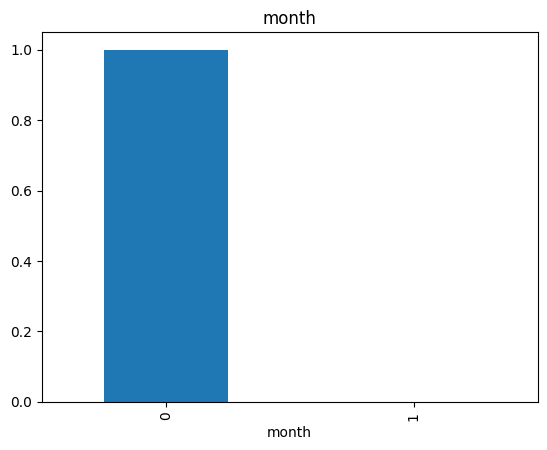

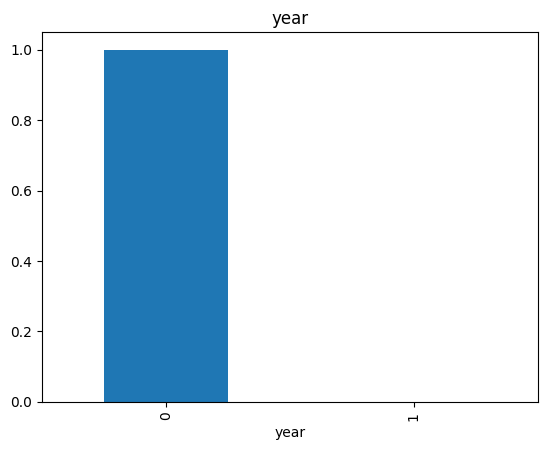

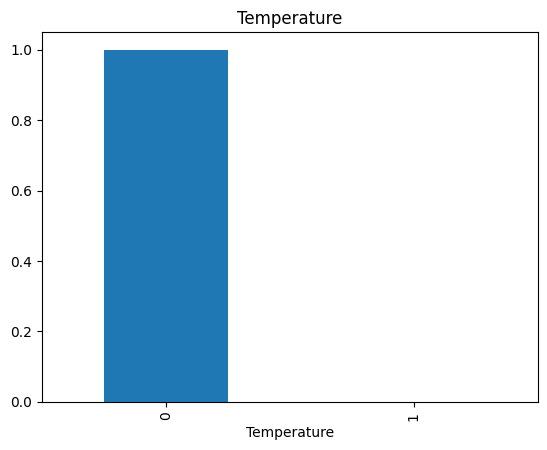

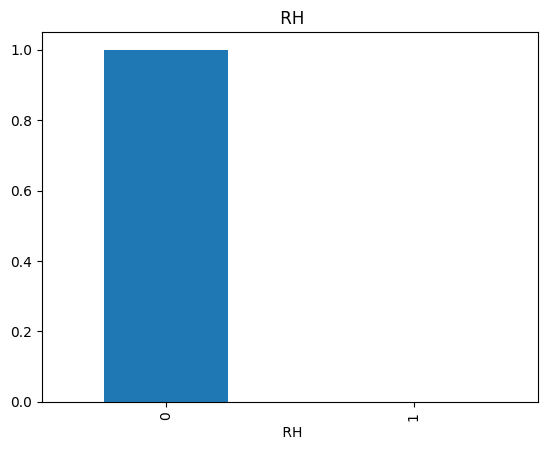

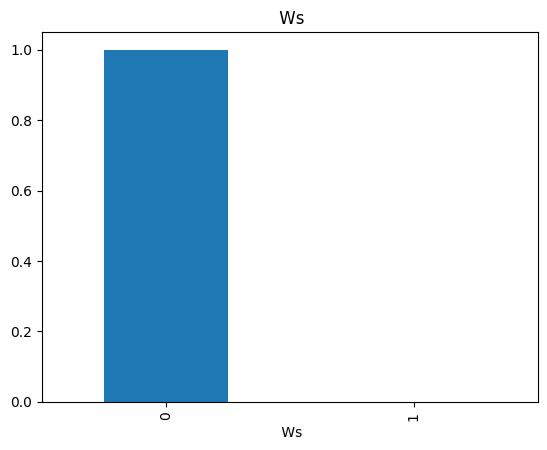

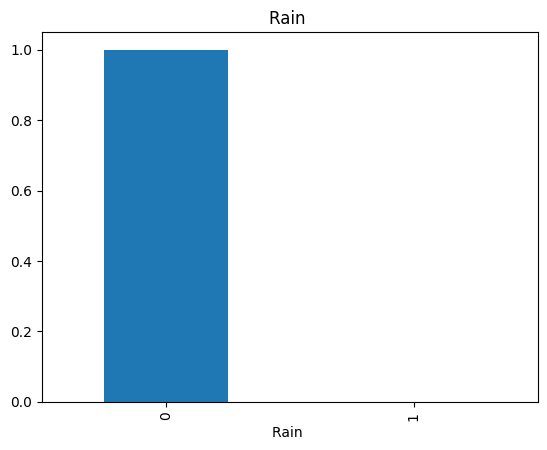

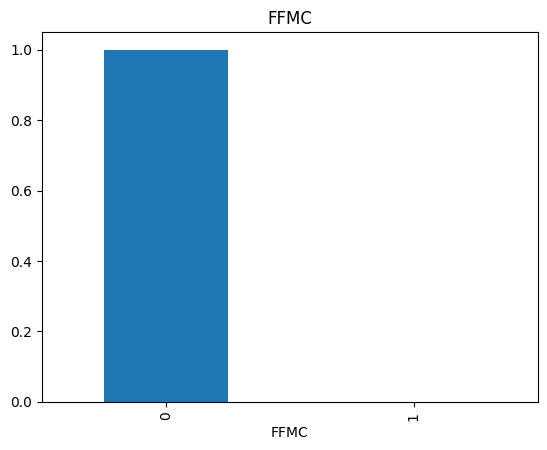

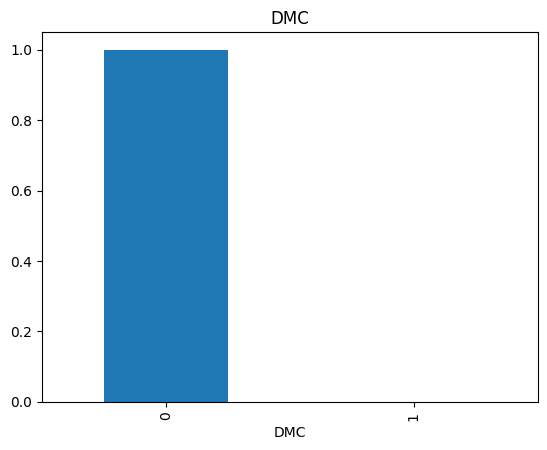

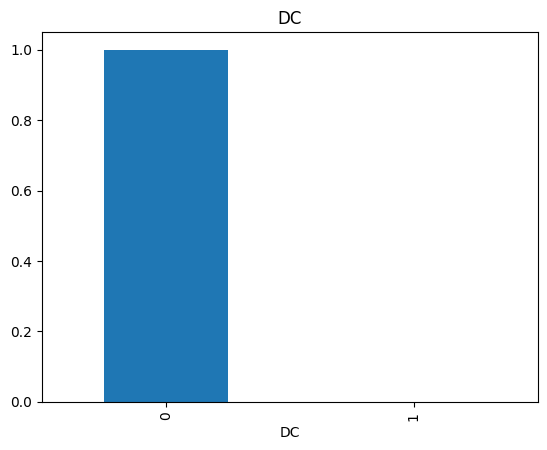

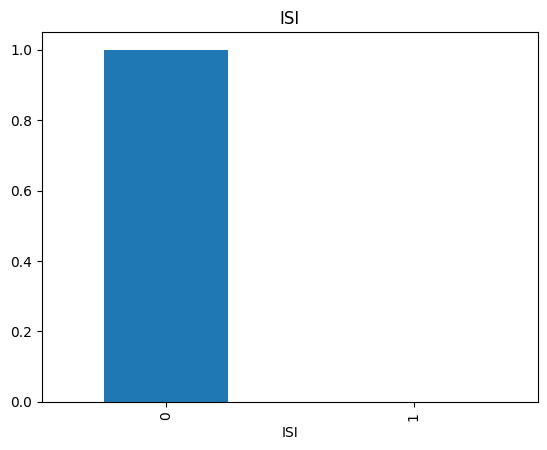

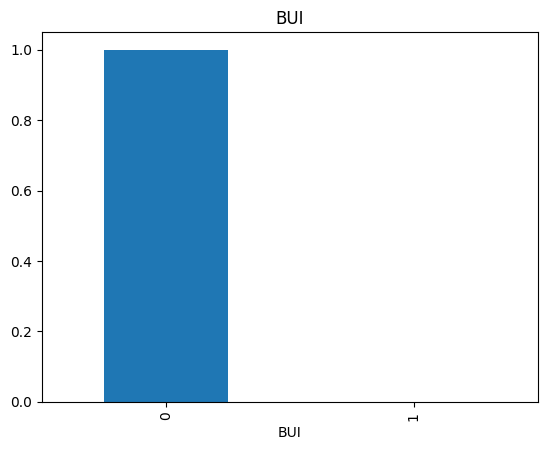

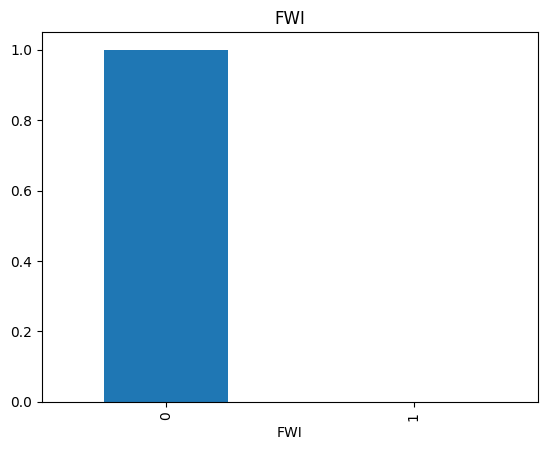

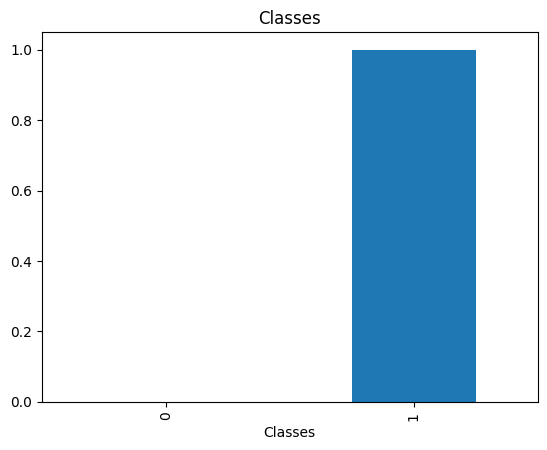

In [9]:
data['Classes']=data['Classes'].map({'not fire':0, 'fire':1})
for feature in features_with_na:
    data[feature] = np.where(data[feature].isnull(), 1,0)
    data.groupby(feature)['Classes'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [10]:
dataset[dataset['Classes'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [11]:
dataset['Classes'].fillna('fire', inplace=True)

In [12]:
percentage_fire = (dataset['Classes'].value_counts()['fire'] / (dataset['Classes'].value_counts()['fire'] + dataset['Classes'].value_counts()['not fire']))*100
percentage_notfire = (dataset['Classes'].value_counts()['not fire'] / (dataset['Classes'].value_counts()['fire'] + dataset['Classes'].value_counts()['not fire']))*100

print(f"Percentage of fire according to dataset is {round(percentage_fire)}%.\nand")
print(f"Percentage of non-fire according to dataset is {round(percentage_notfire)}%.")

Threshold = 1 

if(abs(percentage_fire- percentage_notfire) > Threshold):
    print("Imbalanced dataset")
else:
    print("Balanced dataset")

Percentage of fire according to dataset is 57%.
and
Percentage of non-fire according to dataset is 43%.
Imbalanced dataset


In [17]:
dataset


,Temperature,RH,Ws,Rain,Classes
0,29,57,18,0,not fire
1,29,61,13,1.3,not fire
2,26,82,22,13.1,not fire
3,25,89,13,2.5,not fire
4,27,77,16,0,not fire
...,...,...,...,...,...
241,30,65,14,0,fire
242,28,87,15,4.4,not fire
243,27,87,29,0.5,not fire
244,24,54,18,0.1,not fire


In [16]:
columns_to_drop = ['day', 'month', 'year','FFMC','DMC','DC','ISI','BUI','FWI',]
dataset.drop(columns=columns_to_drop, inplace=True)


In [14]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=42)
oversampled_X, oversampled_Y = sm.fit_resample(dataset.drop('Classes', axis=1), dataset['Classes'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

ModuleNotFoundError: No module named 'imblearn'

In [28]:
oversampled['Classes'].value_counts()


Classes
not fire    408
fire        408
Name: count, dtype: int64

In [29]:
oversampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Classes      816 non-null    object 
 1   Temperature  816 non-null    int64  
 2   RH           816 non-null    int64  
 3   Ws           816 non-null    int64  
 4   Rain         816 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 32.0+ KB


In [18]:
for col in dataset.columns:
    dataset[col] = dataset[col].astype('object')

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  245 non-null    object
 1    RH          245 non-null    object
 2    Ws          245 non-null    object
 3   Rain         245 non-null    object
 4   Classes      246 non-null    object
dtypes: object(5)
memory usage: 9.7+ KB


In [25]:
#dataset.dropna(inplace=True)
dataset.isnull().sum()
oversampled = dataset


In [26]:
oversampled

,Temperature,RH,Ws,Rain,Classes
0,29,57,18,0,not fire
1,29,61,13,1.3,not fire
2,26,82,22,13.1,not fire
3,25,89,13,2.5,not fire
4,27,77,16,0,not fire
...,...,...,...,...,...
241,30,65,14,0,fire
242,28,87,15,4.4,not fire
243,27,87,29,0.5,not fire
244,24,54,18,0.1,not fire


In [27]:
from sklearn import preprocessing
oversampled['Classes']=oversampled['Classes'].map({'not fire':0,'fire':1})
label_encoding = preprocessing.LabelEncoder()
oversampled['Classes'] = label_encoding.fit_transform(oversampled['Classes'])
oversampled['Classes'].unique()

array([0, 1, 2], dtype=int64)

In [37]:
oversampled


,Temperature,RH,Ws,Rain,Classes
0,29,57,18,0,0
1,29,61,13,1.3,0
2,26,82,22,13.1,0
3,25,89,13,2.5,0
4,27,77,16,0,0
...,...,...,...,...,...
241,30,65,14,0,1
242,28,87,15,4.4,0
243,27,87,29,0.5,0
244,24,54,18,0.1,0


In [48]:
print(oversampled['Rain'].unique())


['0' '1.3' '13.1' '2.5' '0.2' '1.2' '0.5' '3.1' '0.7' '0.6' '0.3' '0.1'
 '0.4' '1' '1.4' '0.8' '16.8' '7.2' '10.1' '3.8' '0.9' '1.8' '4.6' '8.3'
 '5.8' '4' '2' '4.7' '8.7' '4.5' '1.1' '1.7' '2.2' '6' '1.9' '2.9' '4.1'
 '6.5' '4.4']


In [49]:
# Remove rows where 'Rain' column has the value 'Rain'
oversampled = oversampled[oversampled['Rain'] != 'Rain ']
 

# Convert 'Rain' column to float
oversampled['Rain'] = oversampled['Rain'].astype(float)



In [50]:
decimal_columns = ["Rain "]

integer_columns = ["Temperature", "RH", "Ws", "Classes"]

for feature in integer_columns:
    oversampled[feature]=oversampled[feature].astype('int64')

In [51]:
oversampled_plot=oversampled.copy()

oversampled_plot['Classes']=oversampled_plot['Classes'].map({'not fire':0,'fire':1})

In [52]:
oversampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 245
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  244 non-null    int64  
 1   RH           244 non-null    int64  
 2   Ws           244 non-null    int64  
 3   Rain         244 non-null    float64
 4   Classes      244 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 11.4 KB


<Figure size 2500x1700 with 0 Axes>

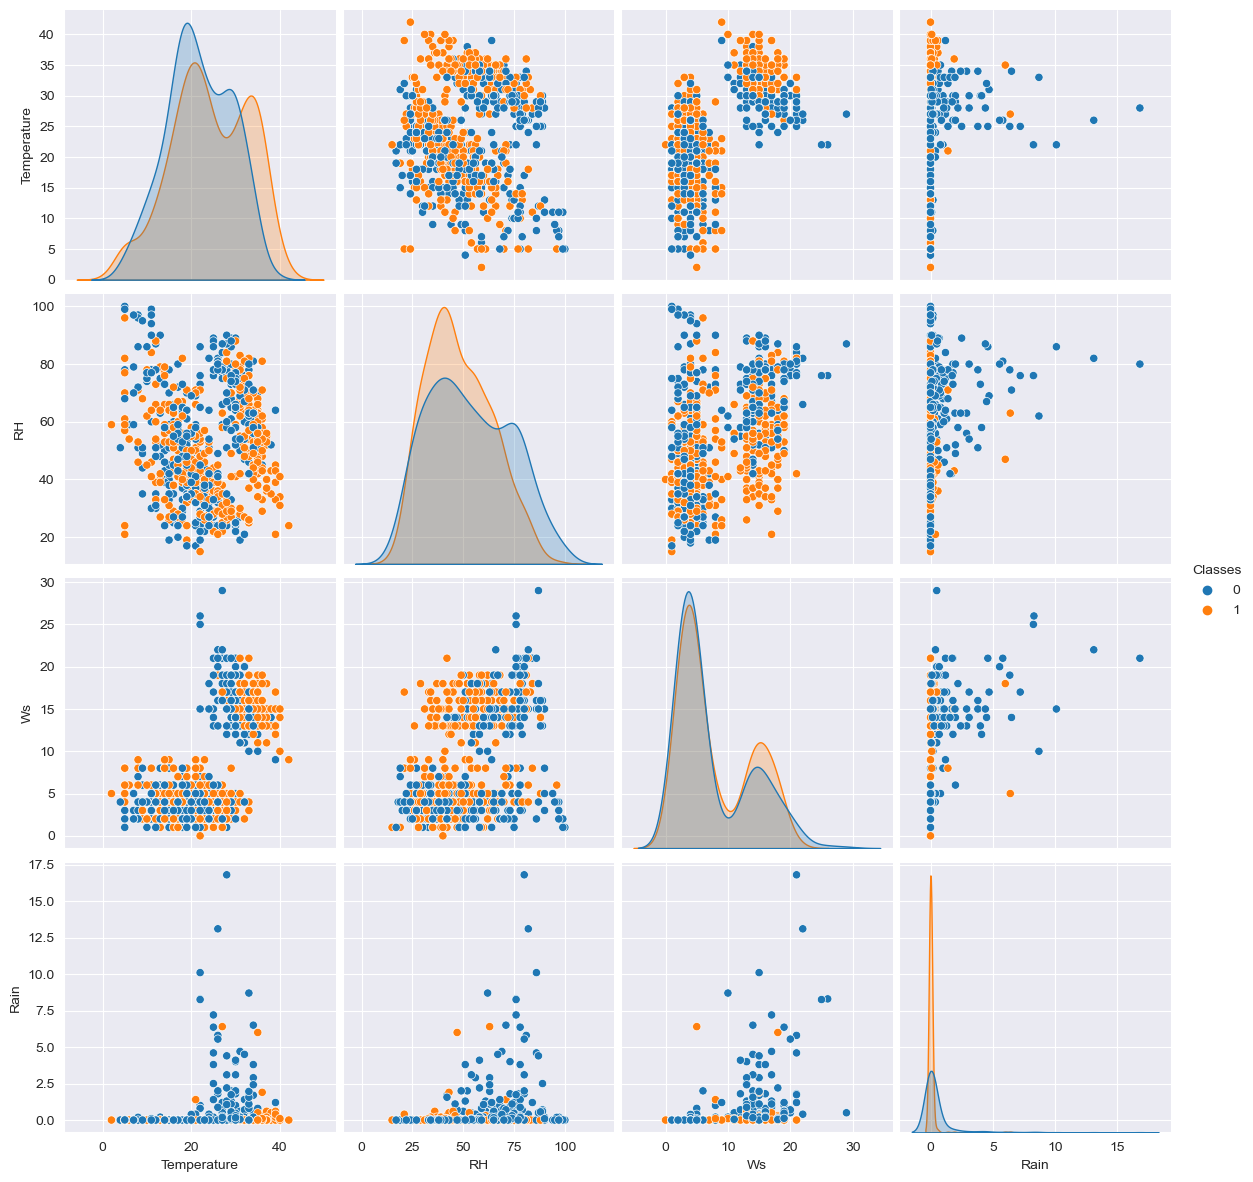

In [38]:
plt.close()
sns.set_style("darkgrid");
plt.figure(figsize=(25, 17))
sns.pairplot(oversampled, hue="Classes", height=3)
plt.show()

In [53]:
feature_list = ["Temperature", "RH", "Ws", "Classes", "Rain"]
IQR = []
for feature in feature_list:
    if feature != "Classes":
        IQR.append(oversampled[feature].quantile(0.75) - oversampled[feature].quantile(0.25))
        
IQR_dict = dict(zip(feature_list, IQR))
print(IQR_dict)

{'Temperature': 5.0, 'RH': 21.25, 'Ws': 3.0, 'Classes': 0.5}


In [54]:
extreme_outliers = ["Ws", "Temperature",]
upper_bridge_val = []

for feature in extreme_outliers:
    upper_bridge_val.append(oversampled[feature].quantile(0.75) + (IQR_dict[feature]*1.5))
print(upper_bridge_val)

upper_bridge = dict(zip(extreme_outliers,upper_bridge_val))
print(upper_bridge)

[21.5, 42.5]
{'Ws': 21.5, 'Temperature': 42.5}


In [55]:
oversampled_no_outliers = oversampled.copy()
for feature in extreme_outliers:
    oversampled_no_outliers.loc[oversampled_no_outliers[feature] > upper_bridge[feature], feature] = upper_bridge[feature]

Text(0, 0.5, 'Classes')

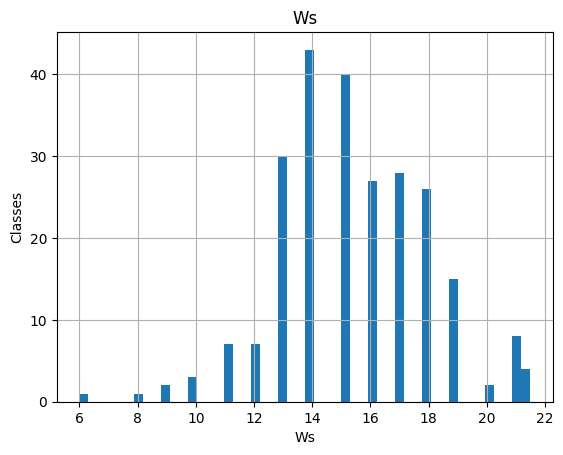

In [56]:
fig=oversampled_no_outliers.Ws.hist(bins=50)
fig.set_title('Ws')
fig.set_xlabel('Ws')
fig.set_ylabel("Classes")

In [57]:
oversampled.describe()


,Temperature,RH,Ws,Rain,Classes
count,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,0.565574
std,3.633843,14.884200,2.810178,1.999406,0.496700
min,22.000000,21.000000,6.000000,0.000000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,1.000000
75%,35.000000,73.250000,17.000000,0.500000,1.000000
max,42.000000,90.000000,29.000000,16.800000,1.000000


<Axes: >

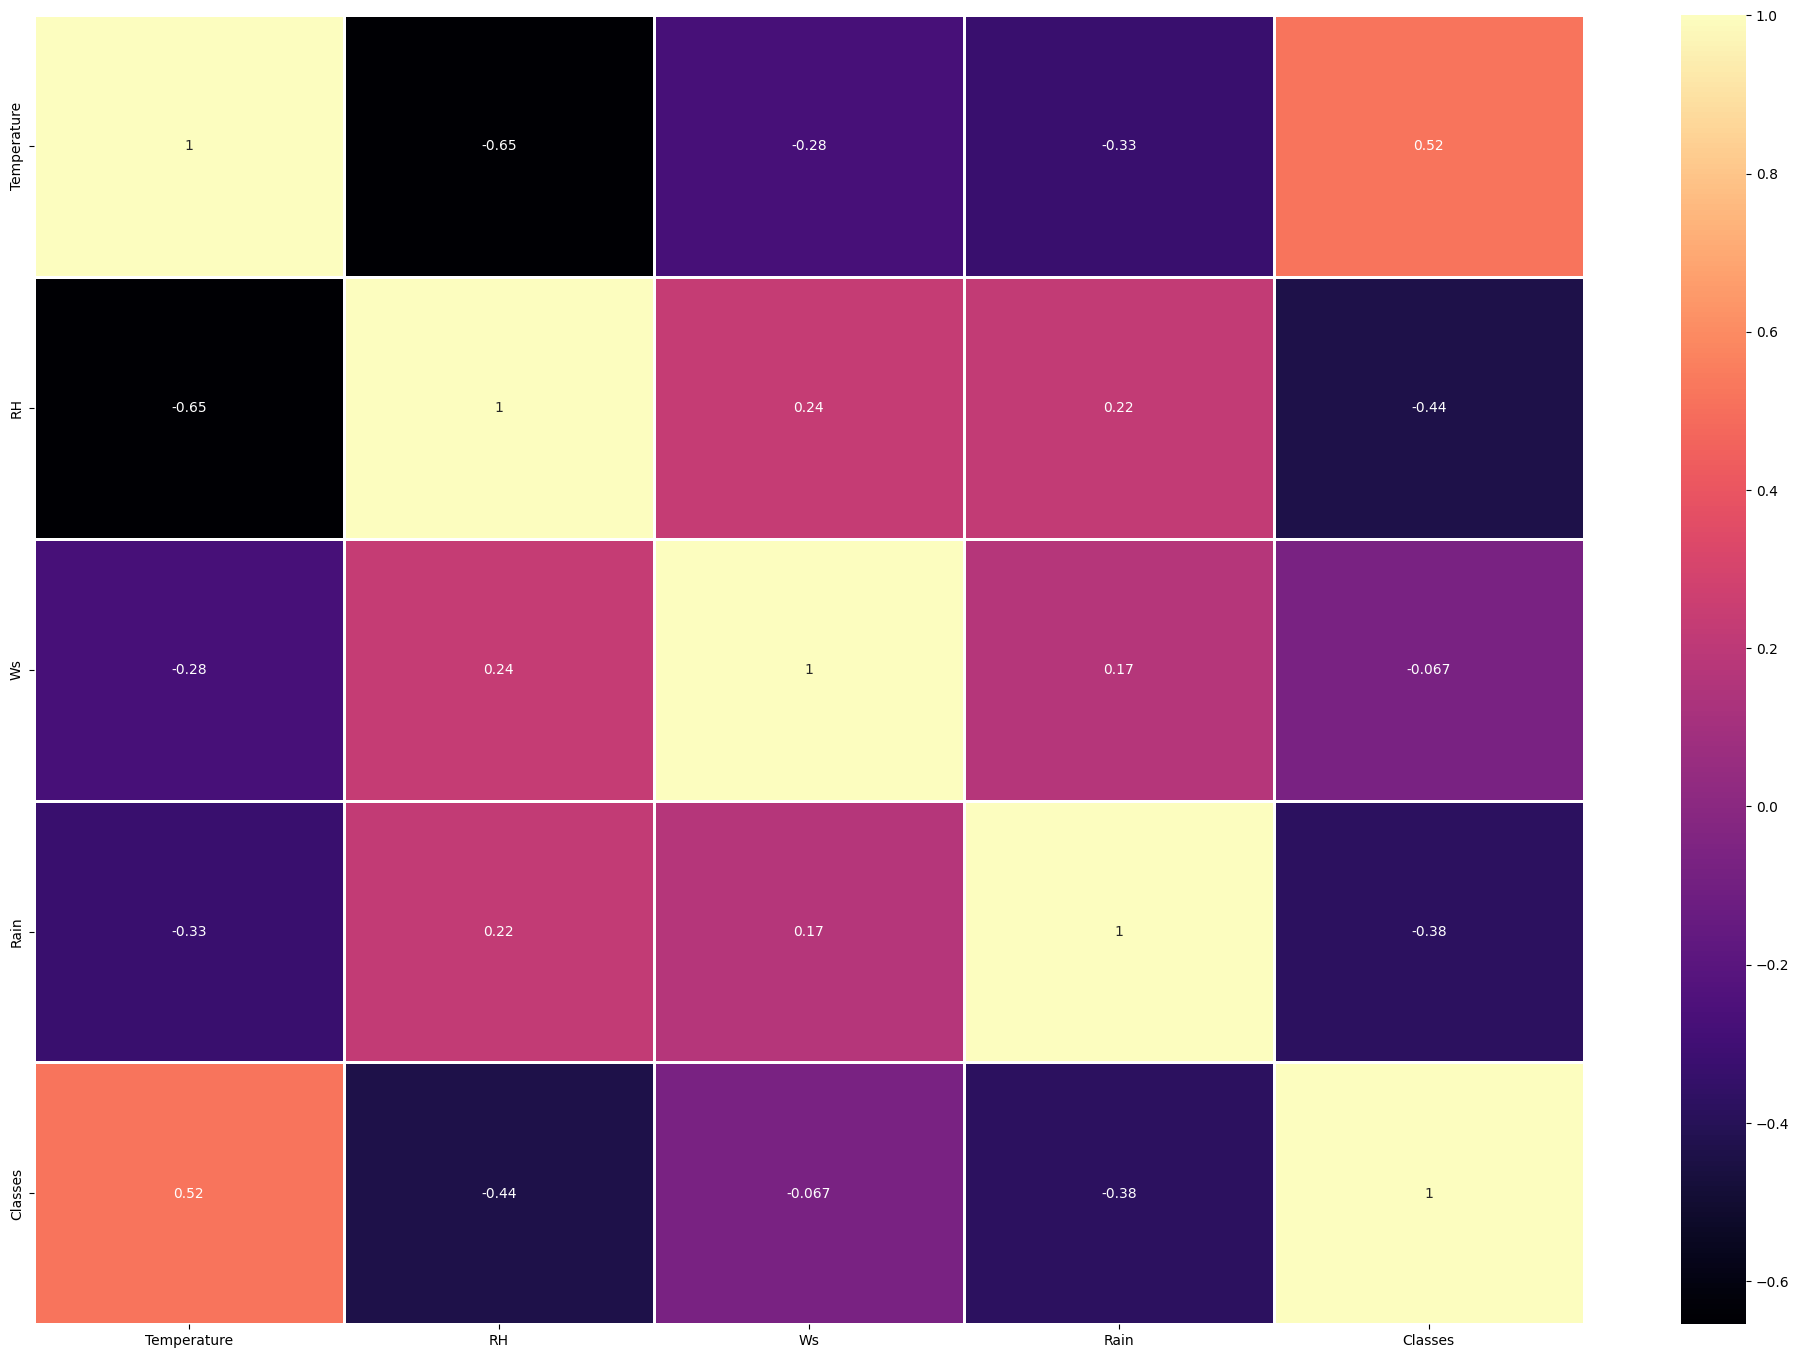

In [58]:
plt.figure (figsize= (25,17))
sns.heatmap(oversampled.corr(),annot=True,cmap='magma',linewidths=1)

In [59]:
oversampled

,Temperature,RH,Ws,Rain,Classes
0,29,57,18,0.0,0
1,29,61,13,1.3,0
2,26,82,22,13.1,0
3,25,89,13,2.5,0
4,27,77,16,0.0,0
...,...,...,...,...,...
241,30,65,14,0.0,1
242,28,87,15,4.4,0
243,27,87,29,0.5,0
244,24,54,18,0.1,0


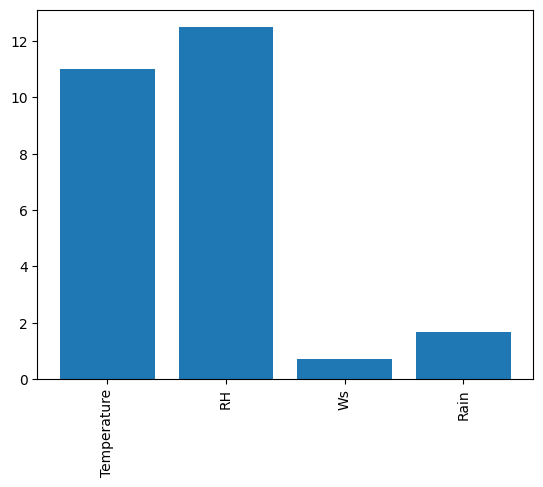

In [60]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif

predictors = ["Temperature", "RH", "Ws", "Rain"]

usethis = oversampled.dropna()
usethis.reset_index(drop=True)

usethis = usethis.filter(["Temperature", "RH", "Ws", "Rain","Classes"], axis=1)

usethisnow = usethis[(usethis["Temperature"]>0) & (usethis["RH"]>0)
                     & (usethis["Ws"]>0) & (usethis["Rain"]>0)]
usethisnow
selector = SelectKBest(f_classif, k="all")
selector.fit(usethisnow[predictors], usethisnow["Classes"])
scores = -np.log10(selector.pvalues_)

plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

In [61]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from matplotlib import pyplot
import numpy as np

In [62]:
lr = LogisticRegression(C=2.0, class_weight='balanced', dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=20, multi_class='multinomial', n_jobs=None, penalty='l2', random_state=1, solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)


In [63]:
dtc = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=5, min_samples_leaf=8, min_weight_fraction_leaf=0.0, max_features=None, random_state=1, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)


In [64]:
 rfc = RandomForestClassifier(n_estimators=104, criterion='gini', max_depth=None, min_samples_split=5, min_samples_leaf=3, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=True, n_jobs=-1, random_state=1, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

In [65]:
 gradient_booster = GradientBoostingClassifier(loss='log_loss', learning_rate=1.0, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=1, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [66]:
svc = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

In [67]:
oversampled

features = ["Temperature", "RH", "Ws", "Rain"]
target = ['Classes']

usethis = oversampled.dropna()
usethis.reset_index(drop=True)

usethis = usethis.filter(["Temperature", "RH", "Ws", "Rain", "Classes"], axis=1)

usethisnow = usethis[(usethis["Temperature"]>0) & (usethis["RH"]>0)
                     & (usethis["Ws"]>0) & (usethis["Rain"]>0)]


y_target = usethisnow["Classes"].values
y=y_target
Xfeatures = usethisnow.drop("Classes", axis=1)
X=Xfeatures 

print(X.shape, y.shape)

(111, 4) (111,)


In [68]:
lr= LogisticRegression(C=2.0, class_weight='balanced', dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=20, multi_class='multinomial', n_jobs=None, penalty='l2', random_state=1, solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores1 = cross_val_score(lr, Xfeatures, y_target, scoring='accuracy', cv=cv1, n_jobs=-1)
print(scores1)
print('LogisticRegression Mean Accuracy: %.3f (%.3f)' % (mean(scores1), std(scores1)))

[0.91666667 0.90909091 0.90909091 0.72727273 1.         0.90909091
 0.72727273 0.81818182 0.72727273 0.72727273 0.83333333 1.
 0.72727273 0.72727273 0.90909091 0.90909091 0.81818182 0.72727273
 0.81818182 0.90909091 1.         0.90909091 1.         0.63636364
 0.72727273 1.         0.63636364 0.72727273 0.81818182 0.81818182]
LogisticRegression Mean Accuracy: 0.834 (0.110)


In [69]:
dtc= DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=5, min_samples_leaf=8, min_weight_fraction_leaf=0.0, max_features=None, random_state=1, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
cv2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores2 = cross_val_score(dtc, Xfeatures, y_target, scoring='accuracy', cv=cv1, n_jobs=-1)
print(scores2)
print('Decision tree Mean Accuracy: %.3f (%.3f)' % (mean(scores2), std(scores2)))

[0.83333333 0.81818182 1.         0.81818182 1.         0.90909091
 0.81818182 0.90909091 0.81818182 0.72727273 0.91666667 1.
 0.81818182 0.81818182 0.81818182 1.         0.81818182 0.72727273
 0.90909091 0.90909091 0.91666667 0.90909091 0.90909091 0.81818182
 0.81818182 1.         0.90909091 0.54545455 0.81818182 0.90909091]
Decision tree Mean Accuracy: 0.865 (0.096)


In [70]:
rfc = RandomForestClassifier(n_estimators=104, criterion='gini', max_depth=None, min_samples_split=5, min_samples_leaf=3, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=True, n_jobs=-1, random_state=1, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
cv3= RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores3 = cross_val_score(rfc, Xfeatures, y_target, scoring='accuracy', cv=cv1, n_jobs=-1)
print(scores3)
print('Random Forest Mean Accuracy: %.3f (%.3f)' % (mean(scores3), std(scores3)))


[0.91666667 0.81818182 1.         0.72727273 1.         1.
 0.90909091 1.         0.81818182 0.72727273 1.         1.
 0.90909091 0.72727273 1.         1.         0.81818182 0.72727273
 0.90909091 0.90909091 0.91666667 1.         0.90909091 0.90909091
 0.81818182 1.         0.81818182 0.63636364 1.         0.90909091]
Random Forest Mean Accuracy: 0.894 (0.105)


In [71]:
gradient_booster = GradientBoostingClassifier(loss='log_loss', learning_rate=1.0, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=1, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
cv4 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores4 = cross_val_score(gradient_booster, Xfeatures, y_target, scoring='accuracy', cv=cv1, n_jobs=-1)
print(scores4)
print('Gradient boosting Mean Accuracy: %.3f (%.3f)' % (mean(scores4), std(scores4)))

[0.91666667 0.90909091 1.         0.90909091 1.         0.81818182
 0.81818182 1.         0.90909091 0.90909091 0.91666667 1.
 1.         0.81818182 1.         1.         1.         0.72727273
 0.81818182 0.90909091 0.91666667 1.         1.         0.90909091
 0.81818182 1.         0.90909091 0.72727273 0.90909091 0.81818182]
Gradient boosting Mean Accuracy: 0.913 (0.083)


In [72]:
svc = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)
cv5 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores5 = cross_val_score(svc, Xfeatures, y_target, scoring='accuracy', cv=cv1, n_jobs=-1)
print(scores5)
print('support vector Mean Accuracy: %.3f (%.3f)' % (mean(scores5), std(scores5)))

[0.91666667 0.90909091 1.         0.72727273 1.         1.
 0.90909091 1.         0.90909091 0.81818182 1.         1.
 0.81818182 1.         1.         1.         0.81818182 0.81818182
 0.81818182 0.90909091 1.         1.         0.90909091 0.90909091
 1.         1.         0.81818182 0.72727273 0.72727273 0.81818182]
support vector Mean Accuracy: 0.909 (0.094)


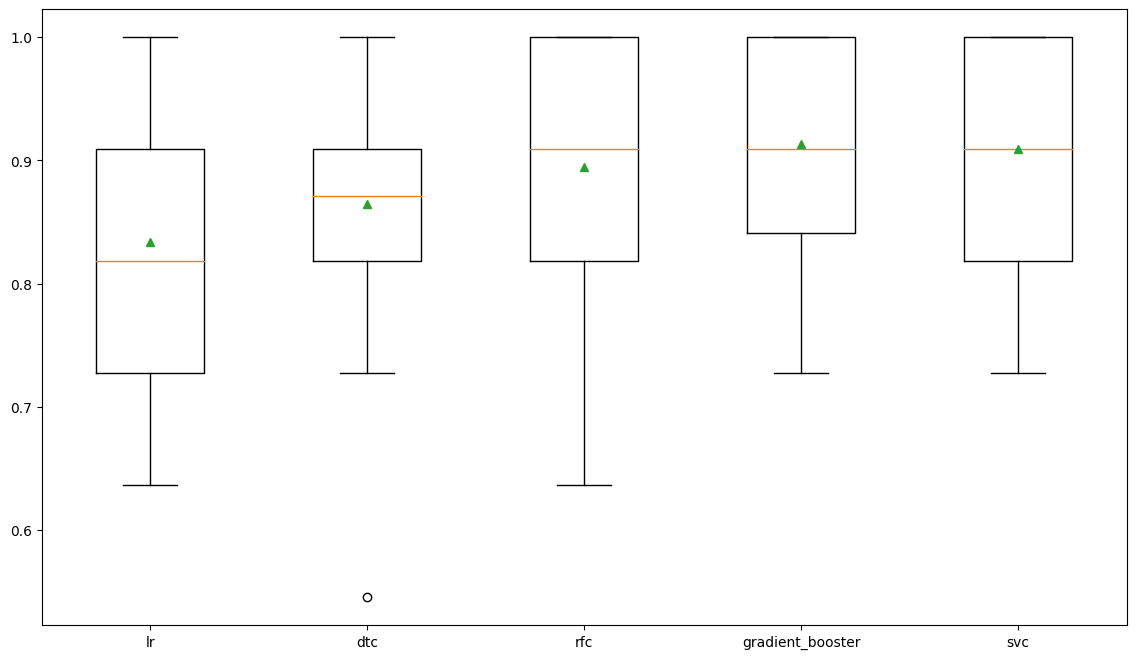

In [73]:
plt.figure (figsize= (14,8))
pyplot.boxplot([scores1, scores2, scores3, scores4, scores5], labels=['lr', 'dtc', 'rfc', 'gradient_booster', 'svc'], showmeans=True)
pyplot.show()

In [75]:
!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 495.5 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 939.4 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.4 MB 804.6 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.4 MB 711.9 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.4 MB 618.3 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.4 MB 623.6 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 603.9 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 582.4 kB/s eta 0:00:03
   ------- ---------------------------

In [74]:
from mlxtend.evaluate import paired_ttest_5x2cv
t, p = paired_ttest_5x2cv(estimator1=svc, estimator2=rfc, X=X, y=y, scoring='accuracy', random_seed=1)
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
if p <= 0.05:
    print('Difference between mean performance is probably real')
else:
    print('Algorithms probably have the same performance')

ModuleNotFoundError: No module named 'mlxtend'

In [76]:

oversampled

features = ["Temperature", "RH", "Ws", "Rain"]
target = ['Classes']

usethis = oversampled.dropna()
usethis.reset_index(drop=True)

usethis = usethis.filter(["Temperature", "RH", "Ws", "Rain", "Classes"], axis=1)

usethisnow = usethis[(usethis["Temperature"]>0) & (usethis["RH"]>0)
                     & (usethis["Ws"]>0) & (usethis["Rain"]>0)]


from sklearn.model_selection import train_test_split
y_target = usethisnow["Classes"].values
Xfeatures = usethisnow.drop("Classes", axis=1)

X_train, X_test, y_train, y_test = train_test_split(Xfeatures,y_target,test_size=0.2,random_state=1)    

In [77]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
X_train = ss.fit_transform (X_train)
X_test = ss.fit_transform (X_test)

In [78]:
X_train.shape, y_train.shape


((88, 4), (88,))

In [79]:
X_test.shape, y_test.shape


((23, 4), (23,))

In [80]:
lr = LogisticRegression(C=2.0, class_weight='balanced', dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=20, multi_class='multinomial', n_jobs=None, penalty='l2', random_state=1, solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)
lr.fit (X_train, y_train)

LogisticRegression(C=2.0, class_weight='balanced', max_iter=20,
                   multi_class='multinomial', random_state=1,
                   solver='newton-cg')

In [81]:
y_pred = lr.predict (X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [82]:
y_pred

from sklearn.metrics import accuracy_score

print(round(accuracy_score(y_test, y_pred) * 100, 0))

83.0


In [83]:
%time history = lr.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 12.6 ms


<Axes: >

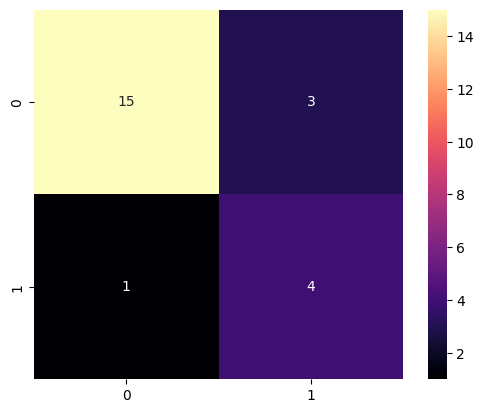

In [84]:
from sklearn.metrics import confusion_matrix
classifier=lr
conf_mat = confusion_matrix(y_test, classifier.predict(X_test))
sns.heatmap(conf_mat, square=True, annot=True, cmap='magma', fmt='d', cbar=True)

In [85]:
predictions = lr.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[15  3]
 [ 1  4]]


In [86]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        18
           1       0.57      0.80      0.67         5

    accuracy                           0.83        23
   macro avg       0.75      0.82      0.77        23
weighted avg       0.86      0.83      0.84        23



In [87]:

dtc = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=5, min_samples_leaf=8, min_weight_fraction_leaf=0.0, max_features=None, random_state=1, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
dtc.fit (X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=8, min_samples_split=5, random_state=1)

In [88]:

y_pred = dtc.predict (X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1], dtype=int64)

In [89]:

y_pred

print(round(accuracy_score(y_test, y_pred) * 100, 0))


87.0


In [90]:

%time history = dtc.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 3 ms


<Axes: >

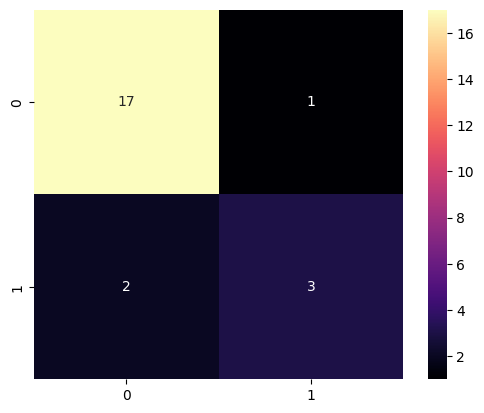

In [91]:

classifier=dtc
conf_mat = confusion_matrix(y_test, classifier.predict(X_test))
sns.heatmap(conf_mat, square=True, annot=True, cmap='magma', fmt='d', cbar=True)

In [92]:
predictions = dtc.predict(X_test)

print(confusion_matrix(y_test,predictions))

[[17  1]
 [ 2  3]]


In [93]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.75      0.60      0.67         5

    accuracy                           0.87        23
   macro avg       0.82      0.77      0.79        23
weighted avg       0.86      0.87      0.86        23



[Text(0.4, 0.875, 'x[1] <= -1.236\ngini = 0.339\nsamples = 88\nvalue = [69, 19]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.6, 0.625, 'x[0] <= 0.85\ngini = 0.186\nsamples = 77\nvalue = [69, 8]'),
 Text(0.4, 0.375, 'x[3] <= -0.568\ngini = 0.088\nsamples = 65\nvalue = [62, 3]'),
 Text(0.2, 0.125, 'gini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 53\nvalue = [53, 0]'),
 Text(0.8, 0.375, 'gini = 0.486\nsamples = 12\nvalue = [7, 5]')]

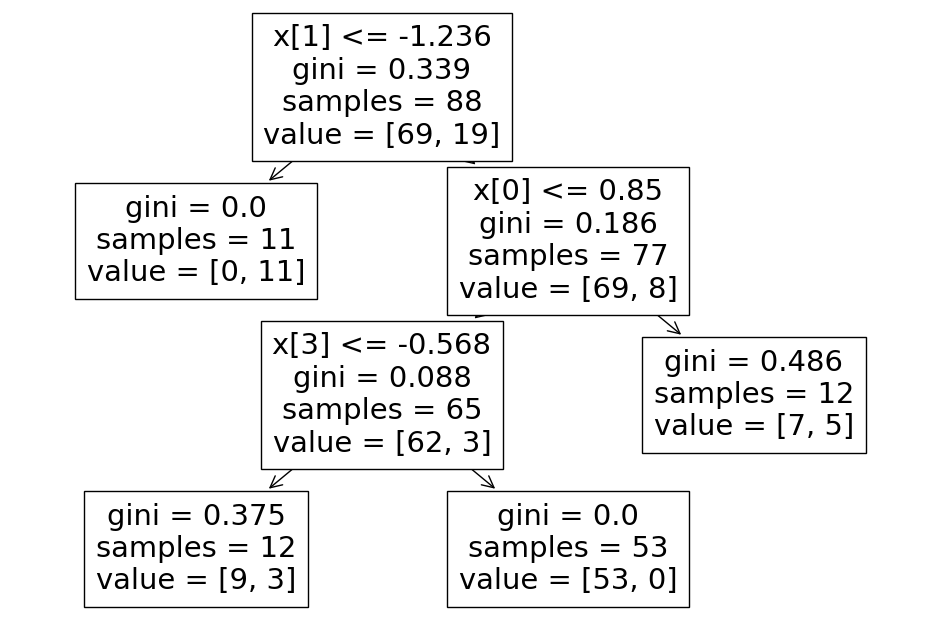

In [94]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(dtc.fit(X_train, y_train))

In [95]:
rfc = RandomForestClassifier(n_estimators=104, criterion='gini', max_depth=None, min_samples_split=5, min_samples_leaf=3, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=True, n_jobs=-1, random_state=1, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
rfc.fit (X_train,y_train)


RandomForestClassifier(min_samples_leaf=3, min_samples_split=5,
                       n_estimators=104, n_jobs=-1, oob_score=True,
                       random_state=1)

In [96]:
y_pred = rfc.predict (X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [97]:

y_pred

from sklearn.metrics import accuracy_score

print(round(accuracy_score(y_test, y_pred) * 100, 0))


91.0


In [98]:
%time history = rfc.fit(X_train, y_train)

CPU times: total: 422 ms
Wall time: 394 ms


<Axes: >

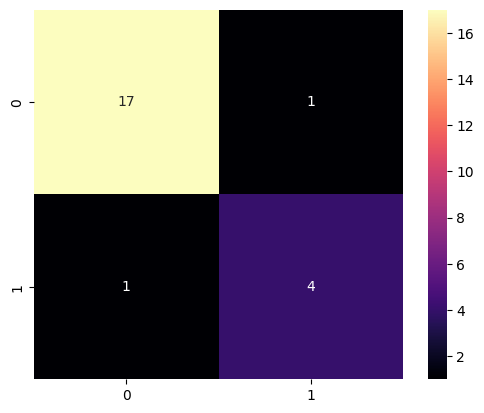

In [99]:

from sklearn.metrics import confusion_matrix
classifier=rfc
conf_mat = confusion_matrix(y_test, classifier.predict(X_test))
sns.heatmap(conf_mat, square=True, annot=True, cmap='magma', fmt='d', cbar=True)

In [100]:
predictions = rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[17  1]
 [ 1  4]]


In [101]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.80      0.80      0.80         5

    accuracy                           0.91        23
   macro avg       0.87      0.87      0.87        23
weighted avg       0.91      0.91      0.91        23



In [102]:

import pickle
filename = 'finalized_model.sav'
pickle.dump(rfc, open(filename, 'wb'))


In [103]:
gradient_booster = GradientBoostingClassifier(loss='log_loss', learning_rate=1.0, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=1, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
gradient_booster.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=1)

In [104]:
y_pred = gradient_booster.predict (X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1], dtype=int64)

In [105]:

y_pred

from sklearn.metrics import accuracy_score

print(round(accuracy_score(y_test, y_pred) * 100, 0))


83.0


In [106]:
%time history = gradient_booster.fit(X_train, y_train)

CPU times: total: 93.8 ms
Wall time: 104 ms


<Axes: >

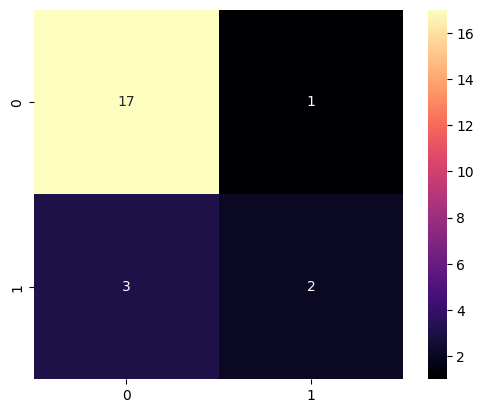

In [107]:
from sklearn.metrics import confusion_matrix
classifier=gradient_booster
conf_mat = confusion_matrix(y_test, classifier.predict(X_test))
sns.heatmap(conf_mat, square=True, annot=True, cmap='magma', fmt='d', cbar=True)

In [108]:
predictions = gradient_booster.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[17  1]
 [ 3  2]]


In [109]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       0.67      0.40      0.50         5

    accuracy                           0.83        23
   macro avg       0.76      0.67      0.70        23
weighted avg       0.81      0.83      0.81        23



In [110]:
svc = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [111]:
y_pred = svc.predict (X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [112]:

y_pred

from sklearn.metrics import accuracy_score

print(round(accuracy_score(y_test, y_pred) * 100, 0))


91.0


In [113]:

%time history = svc.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 2 ms


<Axes: >

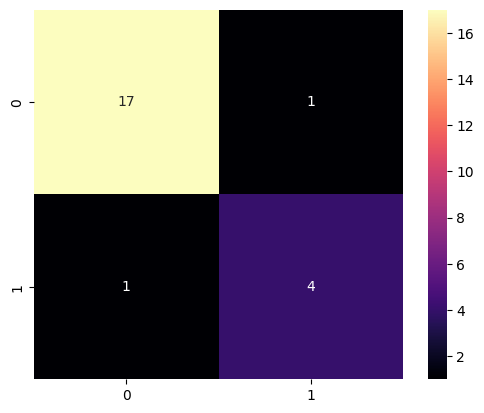

In [114]:

from sklearn.metrics import confusion_matrix
classifier=svc
conf_mat = confusion_matrix(y_test, classifier.predict(X_test))
sns.heatmap(conf_mat, square=True, annot=True, cmap='magma', fmt='d', cbar=True)

In [115]:
predictions = svc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[17  1]
 [ 1  4]]


In [116]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.80      0.80      0.80         5

    accuracy                           0.91        23
   macro avg       0.87      0.87      0.87        23
weighted avg       0.91      0.91      0.91        23



In [117]:
support_vector_indices = svc.support_
print(support_vector_indices)

[ 7 17 23 27 45 48 65 67 70 75 84  1  2 11 21 29 31 42 53 62 76 80]


In [118]:
support_vectors_per_class = svc.n_support_
print(support_vectors_per_class)

[11 11]


In [133]:
import pickle
pickle.dump(svc, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))
randomforest = pickle.load(open('finalized_model.sav','rb'))

In [120]:
model

SVC(gamma='auto', kernel='linear')

In [121]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [122]:
usethisnow

,Temperature,RH,Ws,Rain,Classes
1,29,61,13,1.3,0
2,26,82,22,13.1,0
3,25,89,13,2.5,0
8,25,88,13,0.2,0
12,27,84,21,1.2,0
...,...,...,...,...,...
239,26,49,6,2.0,0
242,28,87,15,4.4,0
243,27,87,29,0.5,0
244,24,54,18,0.1,0


In [123]:
Xfeatures

,Temperature,RH,Ws,Rain
1,29,61,13,1.3
2,26,82,22,13.1
3,25,89,13,2.5
8,25,88,13,0.2
12,27,84,21,1.2
...,...,...,...,...
239,26,49,6,2.0
242,28,87,15,4.4
243,27,87,29,0.5
244,24,54,18,0.1


In [124]:
model.predict([[29, 61, 13, 1.3]])

array([0], dtype=int64)

In [125]:
model.predict([[70, 3, 16, 0]])

array([1], dtype=int64)

In [126]:

randomforest.predict([[70, 3, 16, 0]])

array([0], dtype=int64)

In [127]:
model.predict([[50, 3, 20, 1]])


array([1], dtype=int64)

In [128]:
randomforest.predict([[50, 3, 20, 1]])

array([0], dtype=int64)

In [129]:
model.predict([[-30, 1000, 10, 50]])


array([0], dtype=int64)

In [130]:
randomforest.predict([[50, 3, 20, 1]])

array([0], dtype=int64)

In [134]:
model = pickle.load(open('model.pkl', 'rb'))

prediction = model.predict(X_test)

result = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
print(result)


    Actual  Predicted
0        0          0
1        0          0
2        0          0
3        0          0
4        0          0
5        0          0
6        1          1
7        0          0
8        0          0
9        0          0
10       0          0
11       1          1
12       0          0
13       0          0
14       1          0
15       0          0
16       0          0
17       1          1
18       0          0
19       0          0
20       0          1
21       0          0
22       1          1


In [135]:
from sklearn.metrics import accuracy_score
model = pickle.load(open('model.pkl', 'rb'))

prediction = model.predict(Xfeatures)

usethisnow['Predicted'] = prediction

print(usethisnow)
accuracy = accuracy_score(y_target, prediction)
print("Accuracy:", accuracy)


     Temperature  RH  Ws  Rain  Classes  Predicted
1             29  61  13   1.3        0          0
2             26  82  22  13.1        0          0
3             25  89  13   2.5        0          0
8             25  88  13   0.2        0          0
12            27  84  21   1.2        0          0
..           ...  ..  ..   ...      ...        ...
239           26  49   6   2.0        0          0
242           28  87  15   4.4        0          0
243           27  87  29   0.5        0          0
244           24  54  18   0.1        0          0
245           24  64  15   0.2        0          0

[111 rows x 6 columns]
Accuracy: 0.9009009009009009


In [136]:
svc = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear', probability=True)

In [137]:
y_pred = svc.predict_proba(X_test)
print(y_pred)

[[8.87046411e-01 1.12953589e-01]
 [9.80358153e-01 1.96418470e-02]
 [9.84169076e-01 1.58309235e-02]
 [6.22414259e-01 3.77585741e-01]
 [9.56153177e-01 4.38468226e-02]
 [9.90707519e-01 9.29248147e-03]
 [2.19975874e-01 7.80024126e-01]
 [9.96865647e-01 3.13435291e-03]
 [9.84780870e-01 1.52191299e-02]
 [9.99245633e-01 7.54366814e-04]
 [9.96725650e-01 3.27434985e-03]
 [2.12922870e-02 9.78707713e-01]
 [9.99886150e-01 1.13849738e-04]
 [9.63999735e-01 3.60002652e-02]
 [9.84406835e-01 1.55931652e-02]
 [6.99016396e-01 3.00983604e-01]
 [5.72305033e-01 4.27694967e-01]
 [4.19717918e-01 5.80282082e-01]
 [9.35419809e-01 6.45801915e-02]
 [9.61148215e-01 3.88517852e-02]
 [2.68385722e-01 7.31614278e-01]
 [7.87575210e-01 2.12424790e-01]
 [1.11248092e-01 8.88751908e-01]]


In [144]:
predict = svc.predict_proba([[33,57,16,0.0]])[0, 1]
print(predict*100)


8.298329352042212e-05
